# About Competition


**The goal of this competition is to predict how likely a system is to get infected by malware.The data comes from antivirus software and includes system details and whether it was infected.Using this, we need to build a model to estimate the infection risk**
.

# Importing the Neccesary libraries

In [1]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#for lightbgm
from lightgbm import LGBMClassifier

# Loading the dataset


In [2]:
train_ds = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test_ds = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [3]:
train_ds.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


# exploratory data analysis

In [4]:
train_ds.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [5]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

# Target Feature Distribution

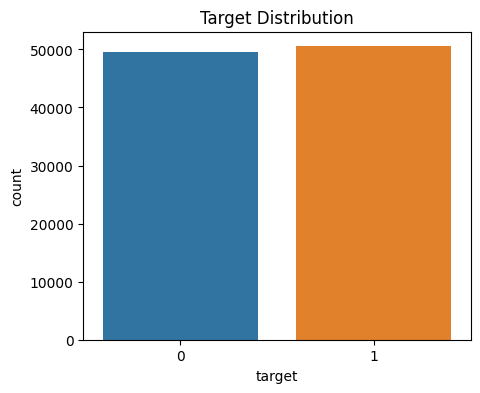

In [6]:
plt.figure(figsize=(5,4))
sns.countplot(x=train_ds['target'])
plt.title("Target Distribution")
plt.show()

**Observations** :
* From the above graph it is concluded that the class is **balanced** means infected and non-infected variables are evenly distributed 
* It will be **good** for training the model

# System Security Feature Distribution

In [7]:
train_ds.groupby('target')["NumAntivirusProductsInstalled"].agg(["mean","median"])

,mean,median
target,,
0,1.406199,1.0
1,1.248554,1.0


**Observations**
* Infected devices have **fewer antivirus products** installed on average.
* Most devices have **similar** number of antivirus products. 

# System Configuration Feature Distribution

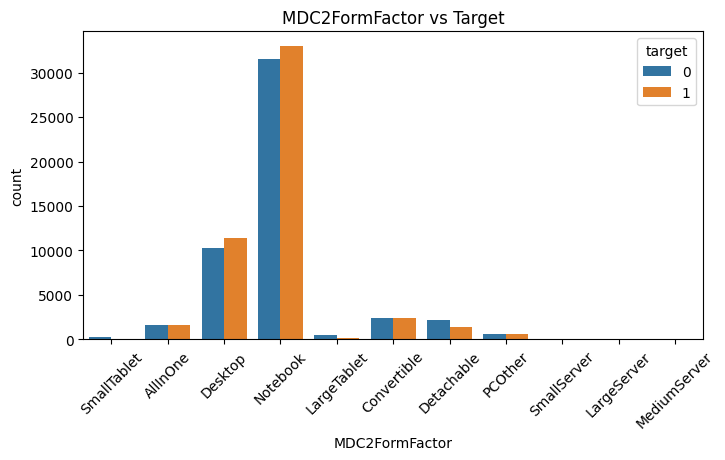

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(x='MDC2FormFactor', hue='target', data=train_ds)
plt.xticks(rotation=45)
plt.title('MDC2FormFactor vs Target')
plt.show()

**Observations**
* **Notebooks** have the **highest** infection count.
* **Desktops** have the **second highest** infection count

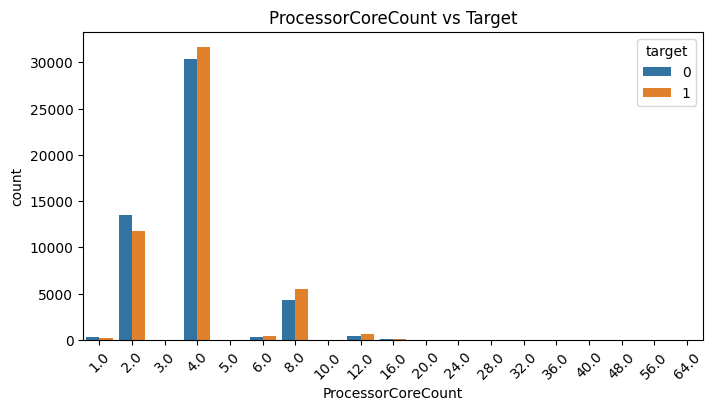

In [9]:
plt.figure(figsize=(8, 4))
sns.countplot(x='ProcessorCoreCount', hue='target', data=train_ds)
plt.xticks(rotation=45)
plt.title('ProcessorCoreCount vs Target')
plt.show()

**Observations**
* Devices with **4 processor cores** have the **highest** infection count.
* Devices with **2 processor cores** have **fewer** infections than non-infected.

# OS Feature Distribution 

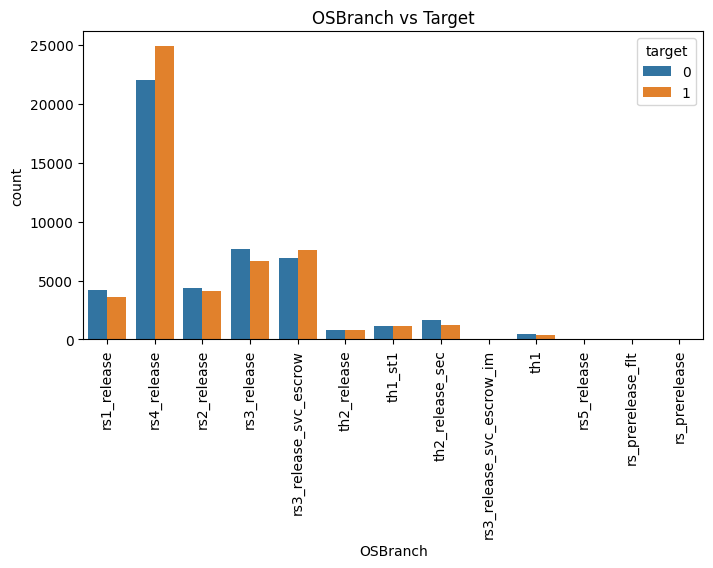

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x='OSBranch', hue='target', data=train_ds)
plt.xticks(rotation=90)
plt.title('OSBranch vs Target')
plt.show()

**Observations**
* The **rs4_release** OS branch has the **highest** number of infections.
* rs3_release, rs1_release have fewer.

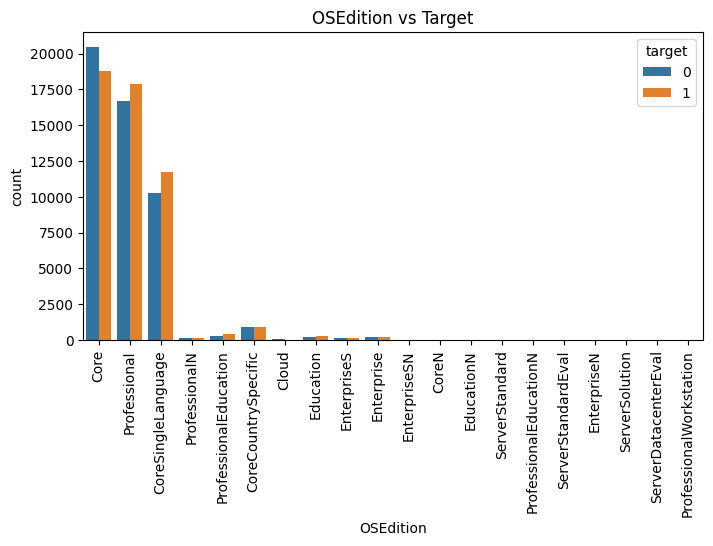

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x='OSEdition', hue='target', data=train_ds)
plt.xticks(rotation=90)
plt.title('OSEdition vs Target')
plt.show()

**Observations**
* **Core** has the **highest count**,but **more non-infected** than infected systems.
* **Professional** and **CoreSingleLanguage** have significant infections.

# Geographical feature Distribution

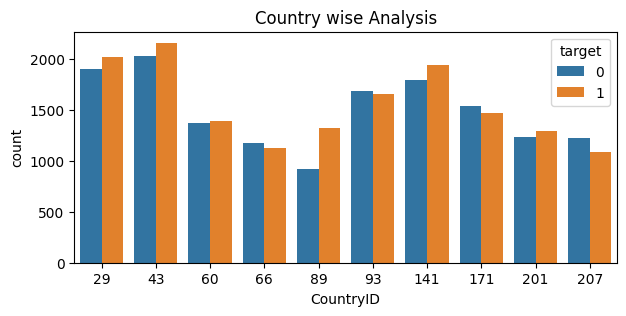

In [12]:
plt.figure(figsize=(7,3))
top_10 = train_ds['CountryID'].value_counts().head(10).index
sns.countplot(x='CountryID', hue='target', data=train_ds[train_ds['CountryID'].isin(top_10)])
plt.title('Country wise Analysis')
plt.show()

**Observations**
* Country 93 has more infected than non-infected systems.
* Countries 29, 43, and 141 has High infection risk.

In [13]:
missing_values = train_ds.isnull().sum()
print(missing_values[missing_values > 0])

RealTimeProtectionState                66
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
CityID                                623
IsSystemProtected                      76
SMode                                 981
IEVersionID                           107
FirewallEnabled                       166
EnableLUA                              19
OEMNameID                             212
OEMModelID                            228
ProcessorCoreCount                     85
ProcessorManufacturerID                85
ProcessorModelID                       85
PrimaryDiskCapacityMB                 110
PrimaryDiskType                        23
SystemVolumeCapacityMB                110
TotalPhysicalRAMMB                    151
ChassisType                             2
PrimaryDisplayDiagonalInches           72
PrimaryDisplayResolutionHorizontal     72
PrimaryDisplayResolutionVertical       72
InternalBatteryNumberOfCharges    

# Data preprocessing

**Dropping the Target**

In [14]:
x = train_ds.drop(columns=['target'])  # Features
y = train_ds['target']  # Target variable

In [15]:
cfeatures = x.select_dtypes(include=['object']).columns
nfeatures = x.select_dtypes(include=['int64', 'float64']).columns

# Feature Engineering

In [16]:
skewed_features = x[nfeatures].skew()
skewed_features

IsBetaUser                              0.000000
RealTimeProtectionState                -6.529578
IsPassiveModeEnabled                    7.333024
AntivirusConfigID                      -2.170315
NumAntivirusProductsInstalled           1.320539
NumAntivirusProductsEnabled             5.548920
HasTpm                                -17.537715
CountryID                               0.151354
CityID                                 -0.017673
GeoRegionID                            -0.220065
LocaleEnglishNameID                     0.584477
OSBuildNumber                          -2.158355
OSProductSuite                         -0.537242
IsSystemProtected                      -4.408146
AutoSampleSubmissionEnabled             0.000000
SMode                                  44.468420
IEVersionID                             3.350552
FirewallEnabled                        -6.869468
EnableLUA                             164.066029
OEMNameID                               0.539915
OEMModelID          

In [17]:
skewed_features = x[nfeatures].skew().abs() > 1
normal_features = nfeatures[~skewed_features]
skewed_features = nfeatures[skewed_features]

In [18]:
#simple median imputer with standard scaler for not skewed columns

num_trans1 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.99))
])

#simple median imputer with Minmax Scaler for skewed columns

num_trans2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.99))
])

#simple most frequent imputer with one hot encoder for categorical columns

cat_trans = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
preprocess = ColumnTransformer([
    ('num', num_trans1, normal_features),
    ('skewed', num_trans2, skewed_features),
    ('cat', cat_trans, cfeatures),
])

# Model Training

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression 

In [21]:
logistic_pipeline = Pipeline([
    ('preprocessing', preprocess),
    ('classifier', LogisticRegression(max_iter=5000))
])

#hyperparameter tuning
parameter = {
    'classifier__penalty' : ['l1','l2','elasticnet'],
    'classifier__C' :[1,2,3,4,5],
    'classifier__max_iter' : [100,200,300]
}
# final_rf_model = GridSearchCV(
#     estimator=logistic_pipeline, 
#     param_grid=parameter, 
#     scoring='accuracy',
#     cv=3,
# )
from sklearn.model_selection import RandomizedSearchCV

model = RandomizedSearchCV(
    estimator = logistic_pipeline,
    param_distributions = parameter,
    cv=2,
    scoring ='balanced_accuracy'
)

In [22]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler()),
                                                                                               ('pca',
                                                                                                PCA(n_components=0.99))]),
                                                                               Index(['IsBetaUser', 'CountryID', 'CityID', 'GeoRegionID',
       'LocaleEnglishNameID', 'OSProductSuite', 'AutoSampleSubmissionEnabled...
       'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
       'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing', 'DateAS', 'DateOS'],
      dtype='object'))])),
                                             ('classifier',
                                              LogisticRegression(max_iter=5000))]),
                   param_distributions={'classifier__C': [1, 2, 3, 4, 5],
                                        'classifier__max_iter': [100, 200, 300],
                                        'classifier__penalty': ['l1', 'l2',
                                                                'elasticnet']},
                   scoring='balanced_accuracy')

In [23]:
model.best_params_

{'classifier__penalty': 'l2', 'classifier__max_iter': 300, 'classifier__C': 1}

In [24]:
# final_rf_model.best_params_

In [25]:
best_logistic_model = model.best_estimator_
y_pred_logistic = best_logistic_model.predict(X_test)
accuracy_score(y_test, y_pred_logistic)

0.6082

In [26]:
# best_logistic_model = final_rf_model.best_estimator_
# y_pred_logistic = best_logistic_model.predict(X_test)
# accuracy_score(y_test, y_pred_logistic)

**Confusion Matrix**

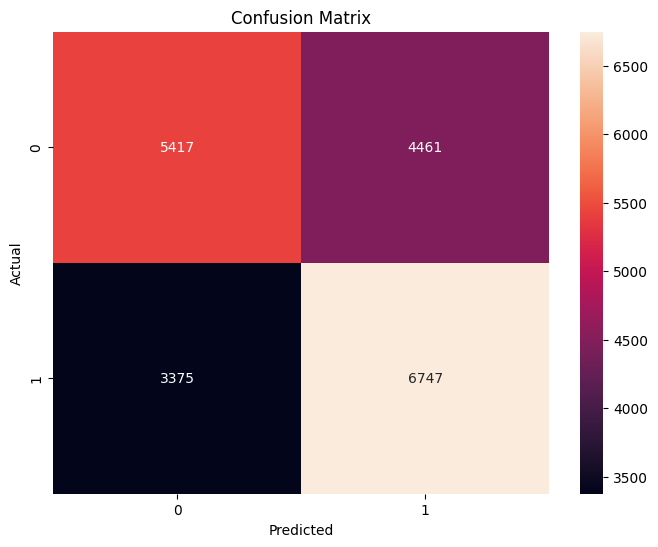

In [27]:
cm = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm,fmt='d', annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# LightGBM

In [28]:
lgbm_model = LGBMClassifier(random_state=42, n_jobs=-1)

lgbm_pipeline = Pipeline([
    ('preprocessor', preprocess),
    ('model', lgbm_model)
])

lgbm_pipeline.fit(X_train, y_train)
y_pred_lgbm = lgbm_pipeline.predict(X_test)

[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12588
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 2246
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151


In [29]:
accuracy_score(y_test, y_pred_lgbm)

0.61935

**Confusion Matrix**

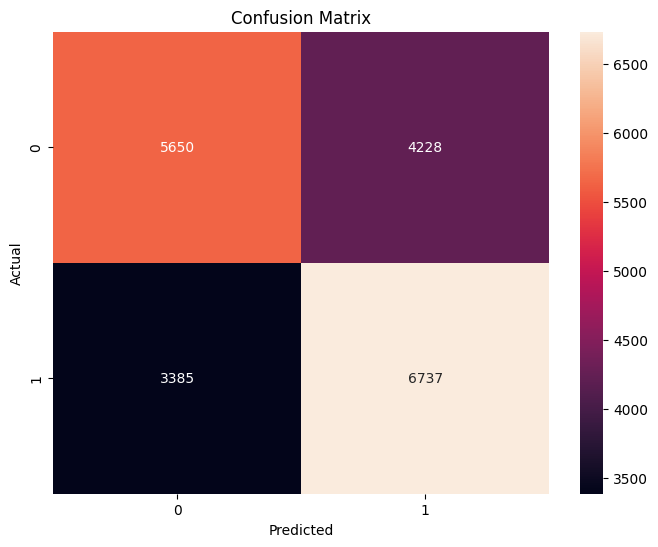

In [30]:
cm = confusion_matrix(y_test,y_pred_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm,fmt='d', annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

# Random Forest

In [ ]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocess),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
])

param_grid_rf = {
    'model__n_estimators': [100, 300],       
    'model__max_depth': [10, None],           
    'model__max_features': ['sqrt'] 
}

final_rf_model = GridSearchCV(
    estimator=rf_pipeline, 
    param_grid=param_grid_rf, 
    cv=3, 
    verbose=2, 
    n_jobs=-1
)

final_rf_model.fit(X_train, y_train)
best_rf_model = final_rf_model.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [ ]:
accuracy_score(y_test, y_pred_lgbm)

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test,y_pred_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm,fmt='d', annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
submission = pd.DataFrame({"id" : range(0 , test_ds.shape[0]) , "target" : lgbm_pipeline.predict(test_ds) })
submission.to_csv('/kaggle/working/submission.csv', index=False)

print("File saved successfully!")